In [71]:
from eos.relativistic_ISCT import Relativistic_ISCT
import os
import pandas as pd

def get_parameters_from_filename(filename):

    
    def get_values(array, string):
        for val in array:
            new_str = string + str(val)
            if new_str in filename:
                return val

    if 'baryons' in filename:
        m = 940.
    elif 'pions' in filename:
        m = 140.
    else:
        m = get_values([20., 25., 30.], 'm_')

    R = get_values([0.39, 0.4], 'R_')
    label = get_values(['ISCT2', 'IST', 'vdw', 'ISCT'], '')
    b = get_values([1., 0.], 'b_')
    g = get_values([3., 30., 300., 3000., 4., 40., 400., 4000.], 'g_')
    mu = get_values([0., 200., 400., 600., 1000., 2000.], 'mu_')

    return label, m, b, R, g, mu

In [7]:
foldername = 'cs_sq_fulldata'
for file in os.listdir(foldername):
    if os.path.isfile(os.path.join(foldername, file)):
        label, m, b, R, g, mu = get_parameters_from_filename(file)
        if b==1.:
            print('*'*30)
            print(file,'\n')
            
            df = pd.read_csv(os.path.join(foldername, file))
            eos = Relativistic_ISCT(eos=label, m=m, g=g, R=R, b=b)
            row = df.loc[df['T'] == 3000.]
            try:
                T, p, Sigma, K = row[['T', 'p', 'Sigma', 'K']].to_numpy()[0]
            except:
                continue
            vratio = eos.v_eff_ratio(0, T, p, Sigma, K)
            print(f'T:\t {T}\t\t v ratio :\t {vratio}')
            print('*'*30)

******************************
cs_sq_extradata_baryons_b_1.0_ISCT2_g_400.0_R_0.39_mu_0.0_.csv 

T:	 3000.0		 v ratio :	 [0.2841917]
******************************
******************************
cs_sq_extradata_baryons_b_1.0_ISCT2_g_4000.0_R_0.39_mu_0.0_.csv 

T:	 3000.0		 v ratio :	 [0.27294643]
******************************
******************************
cs_sq_extradata_baryons_b_1.0_ISCT_g_400.0_R_0.39_mu_0.0_.csv 

T:	 3000.0		 v ratio :	 [0.29591348]
******************************
******************************
cs_sq_extradata_baryons_b_1.0_ISCT_g_4000.0_R_0.39_mu_0.0_.csv 

T:	 3000.0		 v ratio :	 [0.28850975]
******************************
******************************
cs_sq_extradata_pions_b_1.0_ISCT2_g_300.0_R_0.39_mu_0.0_.csv 

T:	 3000.0		 v ratio :	 [0.24004543]
******************************
******************************
cs_sq_extradata_pions_b_1.0_ISCT2_g_3000.0_R_0.39_mu_0.0_.csv 

T:	 3000.0		 v ratio :	 [0.2324392]
******************************
*********************

# $\frac{v_{12}^{Urel}(\theta_v) sin(\theta_v) }{v_{12}^{Nrel}}$ plots 

In [73]:
import numpy as np
import os
save_folder = 'visualization/plots/'

def v_nrel(R1, R2):
    return 4/3*np.pi*(R1 + R2)**3

def v_urel(theta, a, gamma1, gamma2, R1, R2):

    def main_part(theta, gamma, R, R2):
        return 4./3.*np.pi*R/gamma*(R + R2*np.cos(theta/2)**2)**2

    def mixed_part(theta, a, R1, R2):
        return 2.*np.pi*a*R1*R2*(R1 + R2)*np.abs(np.sin(theta))

    return main_part(theta, gamma1, R1, R2) + main_part(theta, gamma2, R2, R1) + mixed_part(theta, a, R1, R2)

def vratio(theta, a, gamma1, gamma2, R1, R2):
    return v_urel(theta, a, gamma1, gamma2, R1, R2)*np.sin(theta)/v_nrel(R1, R2)

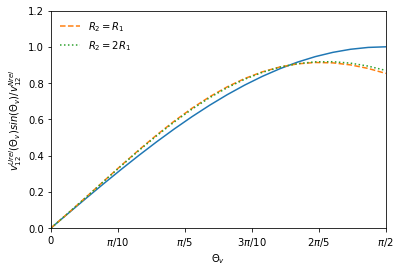

In [74]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

a = 0.775

theta_data = np.linspace(0, np.pi/2, 20)

plt.plot(
    theta_data, [np.sin(theta) for theta in theta_data]
)

plt.plot(
    theta_data,
    [vratio(theta, a, 1, 1, 1, 1) for theta in theta_data],
    '--', label='$R_2 = R_1$'
)

plt.plot(
    theta_data,
    [vratio(theta, a, 1, 1, 1, 2) for theta in theta_data],
    ':', label='$R_2 = 2 R_1$'
)

plt.ylim(0, 1.2)
plt.xlim(0, np.pi/2.)

ax = plt.gca()
ax.set_xticks(np.arange(0, np.pi/2+0.1, np.pi/10))
# ax.set_xticklabels([
#     0, '$\\frac{\\pi}{10}$', '$\\frac{\\pi}{5}$', '$\\frac{3\\pi}{10}$', '$\\frac{2\\pi}{5}$', '$\\frac{\\pi}{2}$'
# ])
ax.set_xticklabels([
    0, '$\\pi/10$', '$\\pi/5$', '$3\\pi/10$', '$2\\pi/5$', '$\\pi/2$'
])

plt.xlabel('$\\Theta_{v}$')
plt.ylabel('$v_{12}^{Urel}(\\Theta_v) sin(\\Theta_v) / v_{12}^{Nrel}$')

plt.legend(frameon=False)
plt.savefig(os.path.join(save_folder, 'vUrel_vNrel_ratio_plot_gamma_1_.pdf'))
plt.show()

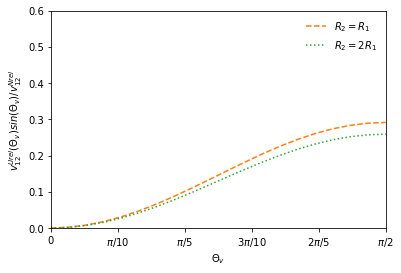

In [75]:
a = 0.775

theta_data = np.linspace(0, np.pi/2, 20)

plt.plot([], [])

plt.plot(
    theta_data,
    [vratio(theta, a, 1000, 1000, 1, 1) for theta in theta_data],
    '--', label='$R_2 = R_1$'
)

plt.plot(
    theta_data,
    [vratio(theta, a, 1000, 1000, 1, 2) for theta in theta_data],
    ':', label='$R_2 = 2 R_1$'
)

plt.ylim(0, 0.6)
plt.xlim(0, np.pi/2.)

ax = plt.gca()
ax.set_xticks(np.arange(0, np.pi/2+0.1, np.pi/10))
# ax.set_xticklabels([
#     0, '$\\frac{\\pi}{10}$', '$\\frac{\\pi}{5}$', '$\\frac{3\\pi}{10}$', '$\\frac{2\\pi}{5}$', '$\\frac{\\pi}{2}$'
# ])
ax.set_xticklabels([
    0, '$\\pi/10$', '$\\pi/5$', '$3\\pi/10$', '$2\\pi/5$', '$\\pi/2$'
])

plt.xlabel('$\\Theta_{v}$')
plt.ylabel('$v_{12}^{Urel}(\\Theta_v) sin(\\Theta_v) / v_{12}^{Nrel}$')

plt.legend(frameon=False)
plt.savefig(os.path.join(save_folder, 'vUrel_vNrel_ratio_plot_gamma_1000_.pdf'))
plt.show()